In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
data = pd.read_csv('Noisy_Simulated_Physics.csv')

In [6]:
data.shape

(47, 2)

In [32]:
data.head()

,Time,Height
0,0.0,100.047299
1,0.1,100.398600
2,0.2,100.626499
3,0.3,99.229390
4,0.4,98.505000


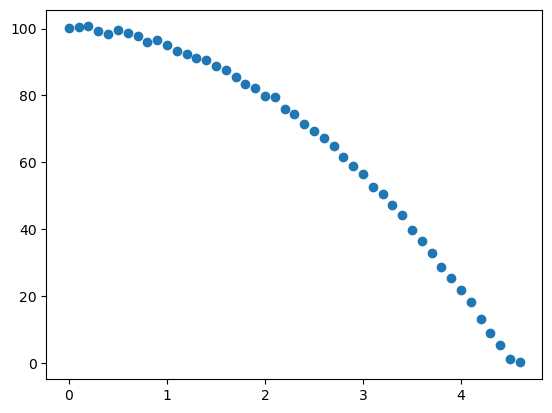

In [34]:
plt.scatter(data['Time'],data['Height'])
plt.show()

In [38]:
# Step 1: Select the feature and target variable for modeling
X = data[['Time']]
y = data['Height']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
# Step 3: Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly[:5]

array([[ 1.  ,  1.3 ,  1.69],
       [ 1.  ,  1.7 ,  2.89],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  0.9 ,  0.81]])

In [46]:
# Step 3: Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly[:5]

array([[ 1.  ,  1.3 ,  1.69],
       [ 1.  ,  1.7 ,  2.89],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  0.9 ,  0.81]])

In [48]:
# Step 4: Create a Linear Regression model and fit it using the transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
# Print the model's coefficients and intercept
model.coef_,model.intercept_

(array([ 0.        , -0.80222366, -4.70112442]), 100.60959279244659)

In [52]:
# Step 1: Make predictions on the test set using the trained model
X_test_poly = poly.fit_transform(X_test)
y_pred = model.predict(X_test_poly)
y_pred
# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Step 3: Print the MSE and R2 values
mse, r2

(0.4240609811300422, 0.9995194633856159)

C:\Users\Sumit Sah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


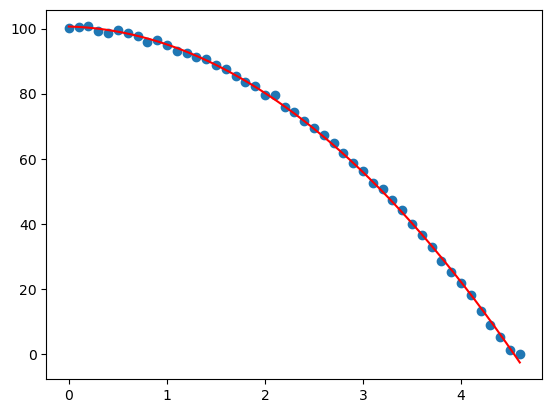

In [62]:
#Curve Visualisation
x_insample = np.linspace(data['Time'].min(),data['Time'].max(),300).reshape(-1,1)
x_insample
x_insample_poly = poly.transform(x_insample)
y_out = model.predict(x_insample_poly)
plt.scatter(data['Time'],data['Height'])
plt.plot(x_insample, y_out, color='red')
plt.show()